In [87]:
import pandas as pd

col_names = ["age", 
             "workclass", 
             "fnlwgt", 
             "education", 
             "education-num", 
             "marital-status", 
             "occupation", 
             "relationship", 
             "race", 
             "sex", 
             "capital-gain", 
             "capital-loss", 
             "hours-per-week", 
             "native-country",
             "income > 50?"] 

df = pd.read_csv("~/data/adult/adult.data", header=None)

In [88]:
df.columns = col_names

In [89]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income > 50?
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [19]:
X = df.drop(columns=["income > 50?"]).values
y = df["income > 50?"].values

In [20]:
X

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [23]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


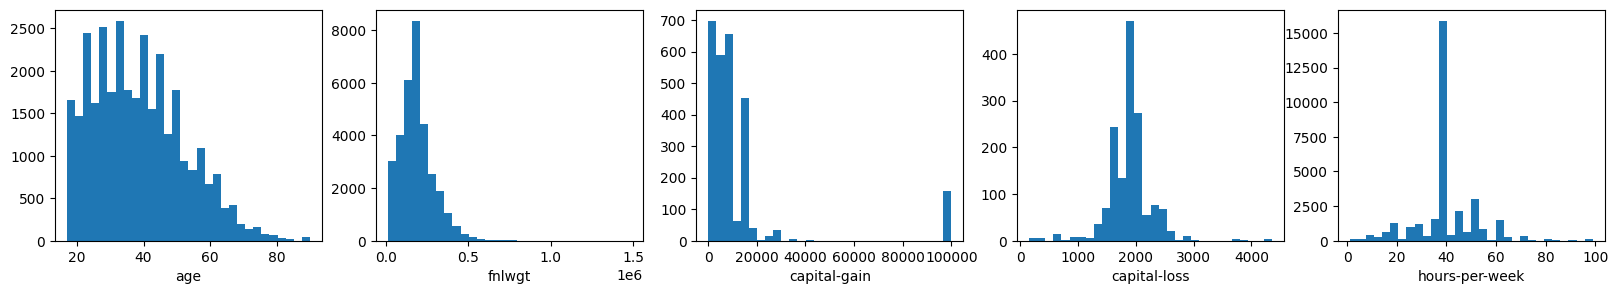

In [37]:
import matplotlib.pyplot as plt

col_num = [ 'age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week' ]

fig, ax = plt.subplots(1, len(col_num), figsize=(20, 3))

for i, col in enumerate(col_num):

    if col in [ "capital-gain", "capital-loss" ]:
        mask = df[col] > 0
        ax[i].hist(df[col][mask], bins=30)
    else:
        ax[i].hist(df[col], bins=30)
        
    ax[i].set_xlabel(col)

In [35]:
(df["capital-loss"] == 0).mean()

0.9533490986149074

In [36]:
(df["capital-gain"] == 0).mean()

0.9167101747489328

In [41]:
cat_features = [
             "workclass", 
             "education", 
             "marital-status", 
             "occupation", 
             "relationship", 
             "race", 
             "sex", 
             "native-country",
             "income > 50?"]

In [47]:
df["race"].value_counts()

race
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64

In [48]:
for col in cat_features:
    print(col)
    print(df[col].value_counts())
    print()

workclass
workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

education
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

marital-status
marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

occupation
occ

In [50]:
7841 / (7841 + 24720)

0.2408095574460244

In [55]:
cat_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income > 50?']

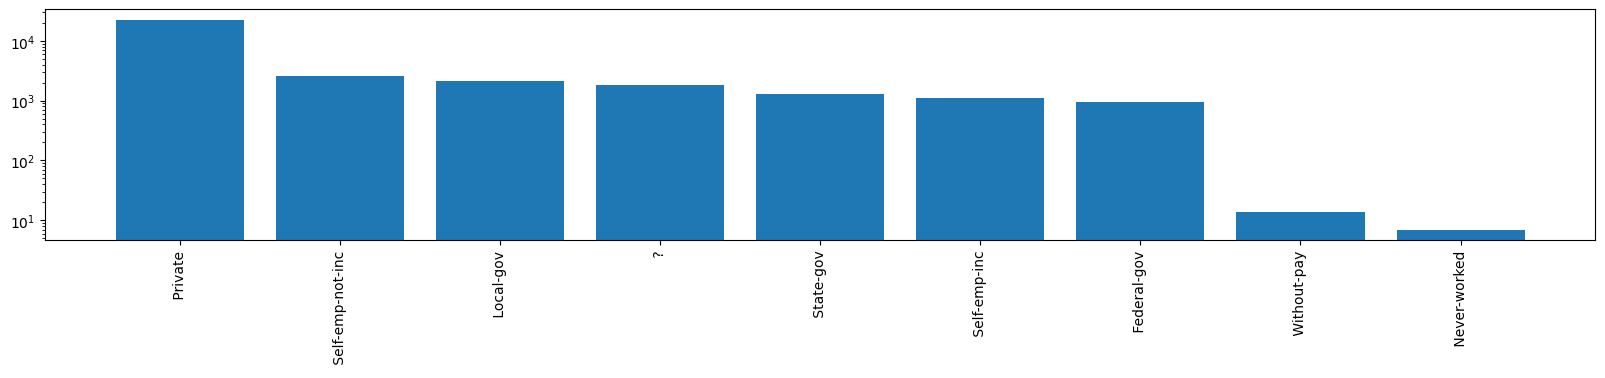

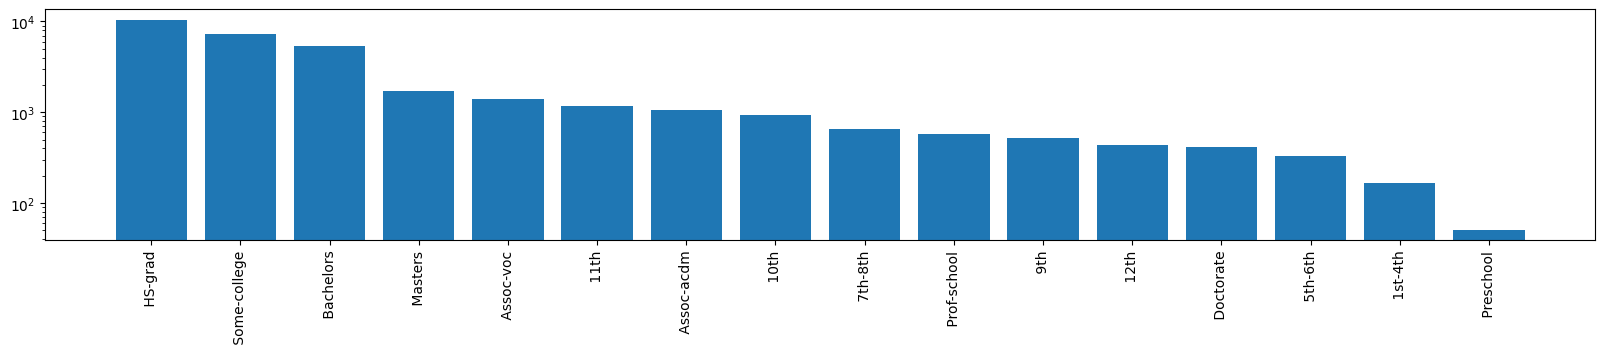

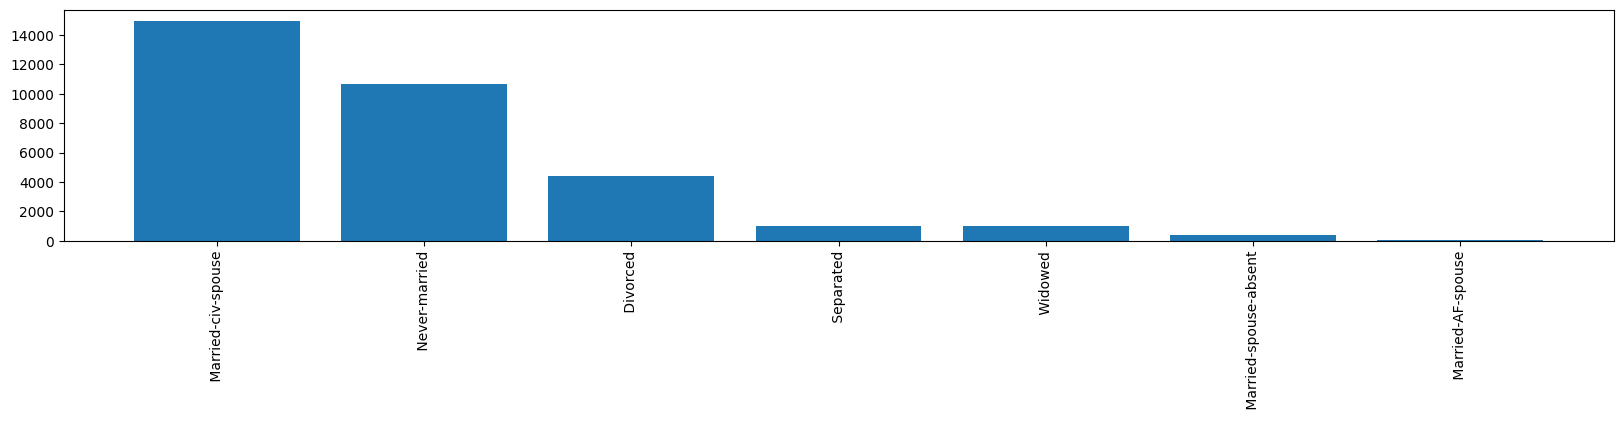

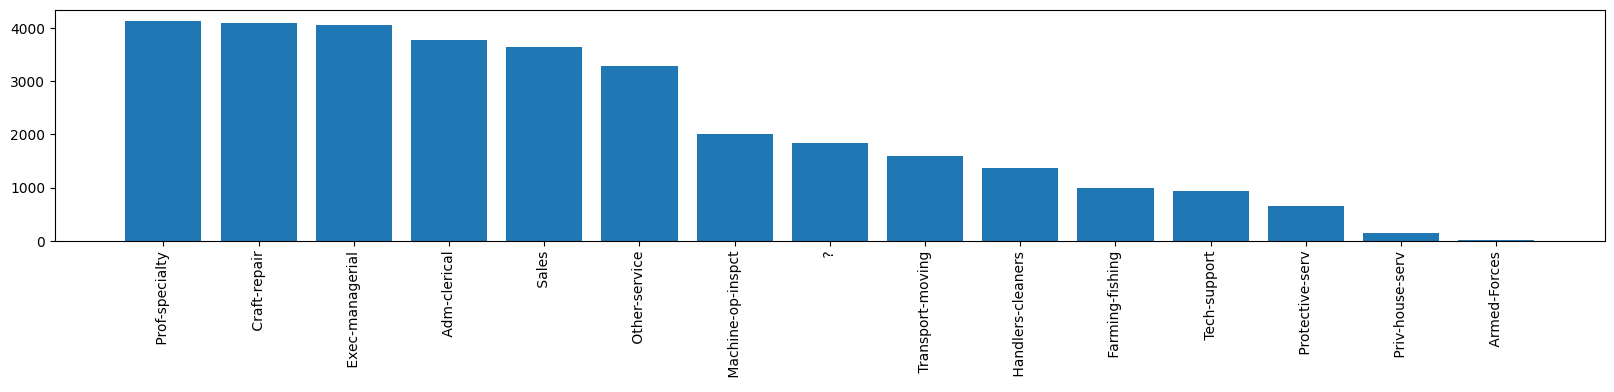

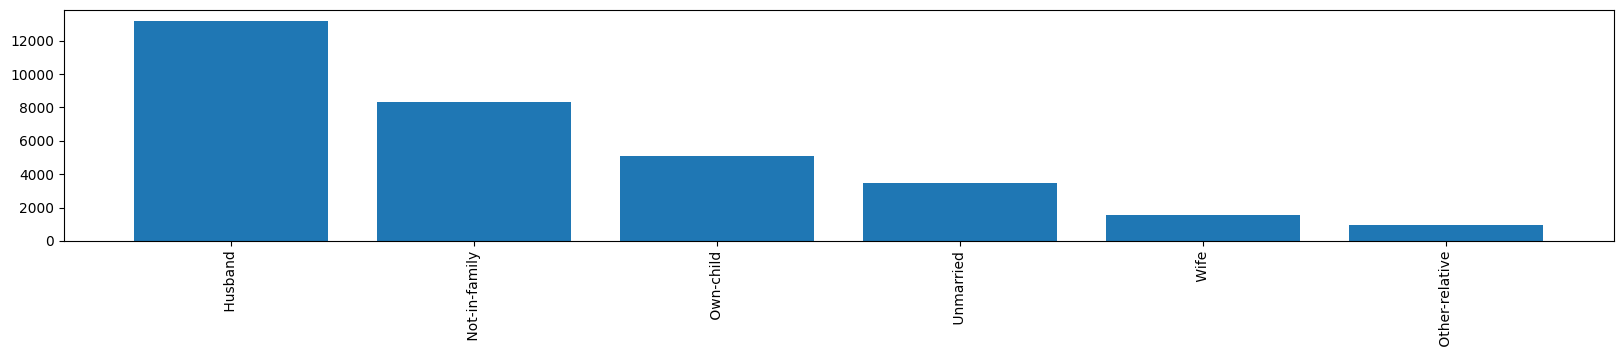

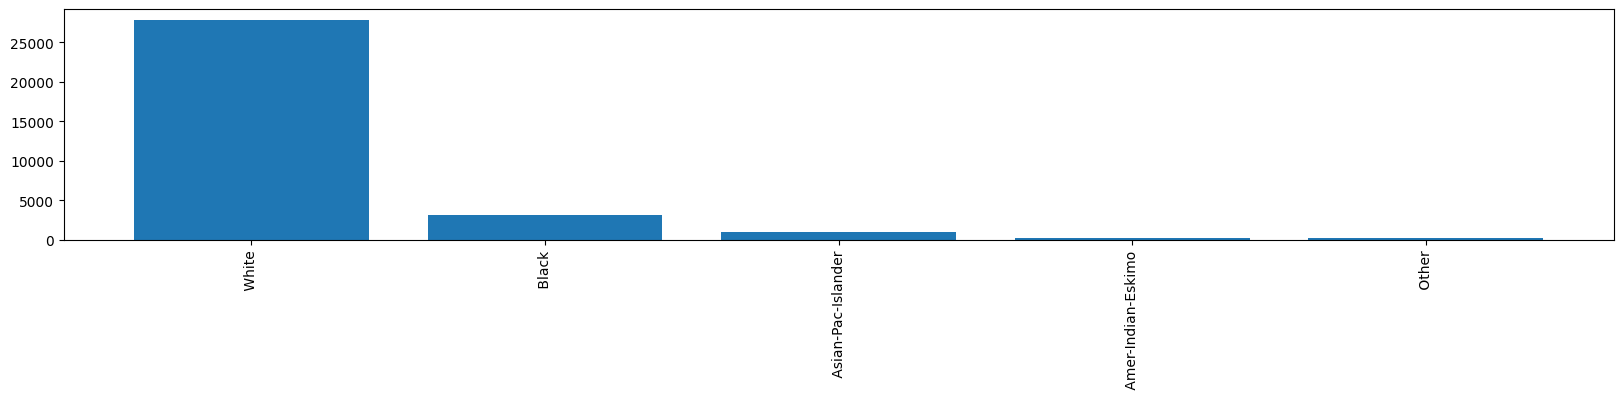

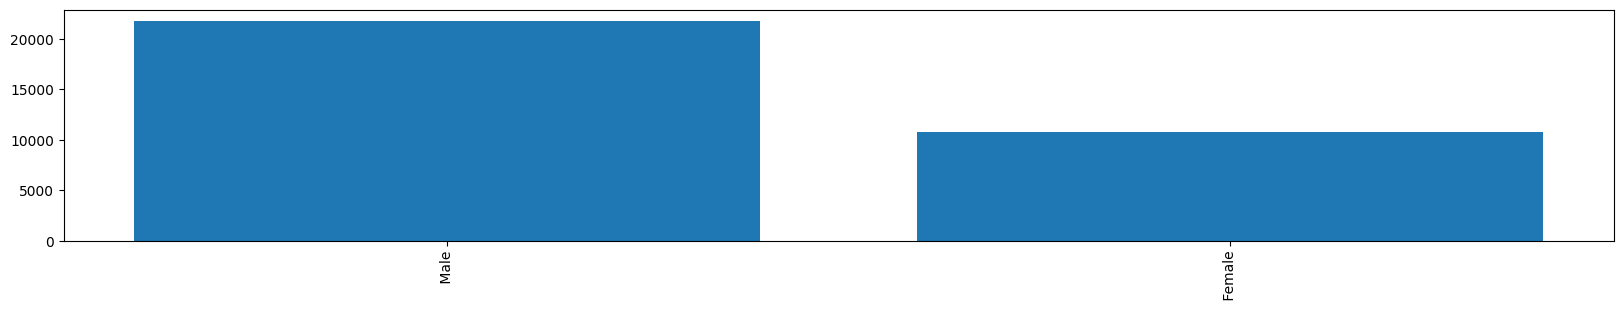

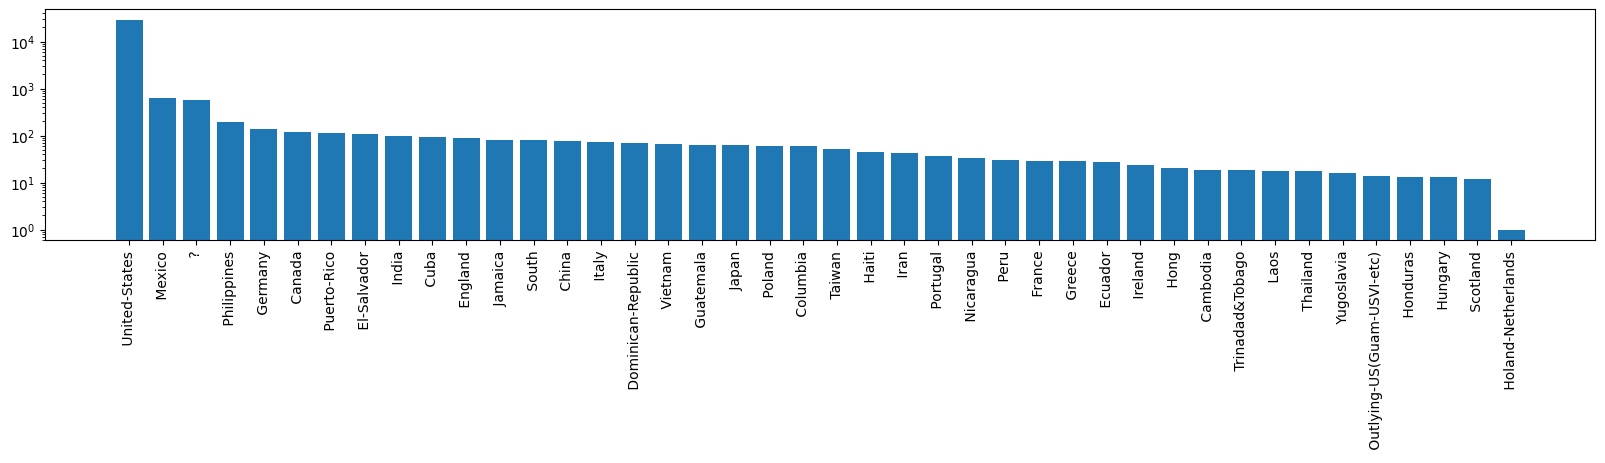

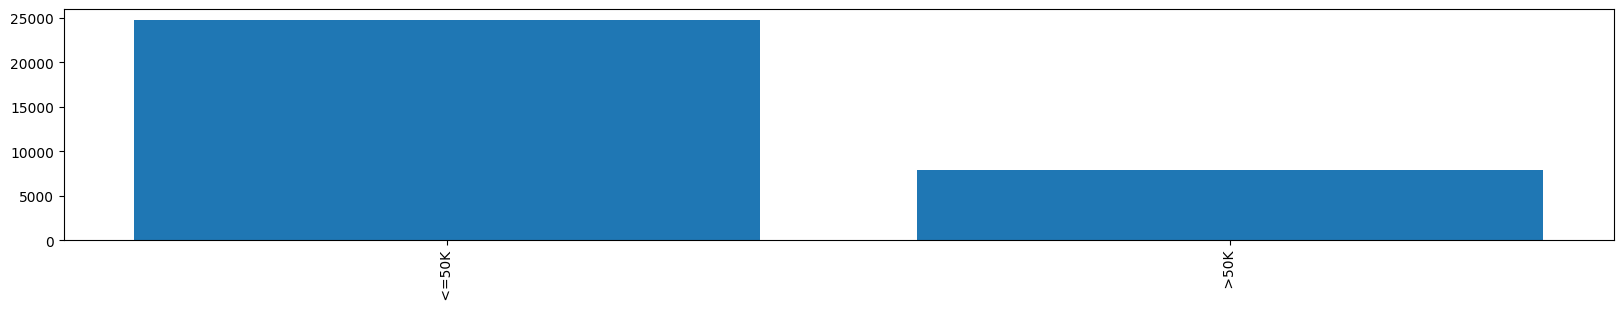

In [59]:
log_features = [ "workclass", "education", "native-country" ]
for col in cat_features:
    fig, ax = plt.subplots(figsize=(20, 3))
    cnts = df[col].value_counts()
    counts = cnts.values
    labels = cnts.index
    ax.bar(range(len(labels)), counts, tick_label=labels)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    if col in log_features:
        ax.set_yscale("log")

In [60]:
X

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [61]:
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [62]:
from sklearn.preprocessing import OneHotEncoder

In [65]:
import numpy as np

X = np.array([
    ['a','x'],
    ['b','x'],
    ['c','y'],
    ['c','z']
])

In [66]:
X

array([['a', 'x'],
       ['b', 'x'],
       ['c', 'y'],
       ['c', 'z']], dtype='<U1')

In [69]:
ohe = OneHotEncoder(sparse_output=False)

In [70]:
ohe.fit_transform(X)

array([[1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1.]])

In [71]:
ohe.get_feature_names_out()

array(['x0_a', 'x0_b', 'x0_c', 'x1_x', 'x1_y', 'x1_z'], dtype=object)

In [80]:
cat_input_features = [
             "workclass", 
             "education", 
             "marital-status", 
             "occupation", 
             "relationship", 
             "race", 
             "sex", 
             "native-country"]

X_cat = ohe.fit_transform(df[cat_input_features])
X_num = df[col_num].values

In [81]:
X_cat.shape

(32561, 102)

In [82]:
X_num.shape

(32561, 5)

In [90]:
X = np.hstack([X_cat, X_num])

In [124]:
X.shape

(32561, 107)

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

In [126]:
X_train.shape

(26048, 107)

In [127]:
X_test.shape

(6513, 107)

In [169]:
clf = DecisionTreeClassifier(max_depth=20)
# clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [170]:
from sklearn.tree import plot_tree

In [171]:
cat_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income > 50?']

In [172]:
col_num

['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

In [173]:
all_features = ohe.get_feature_names_out().tolist() + col_num

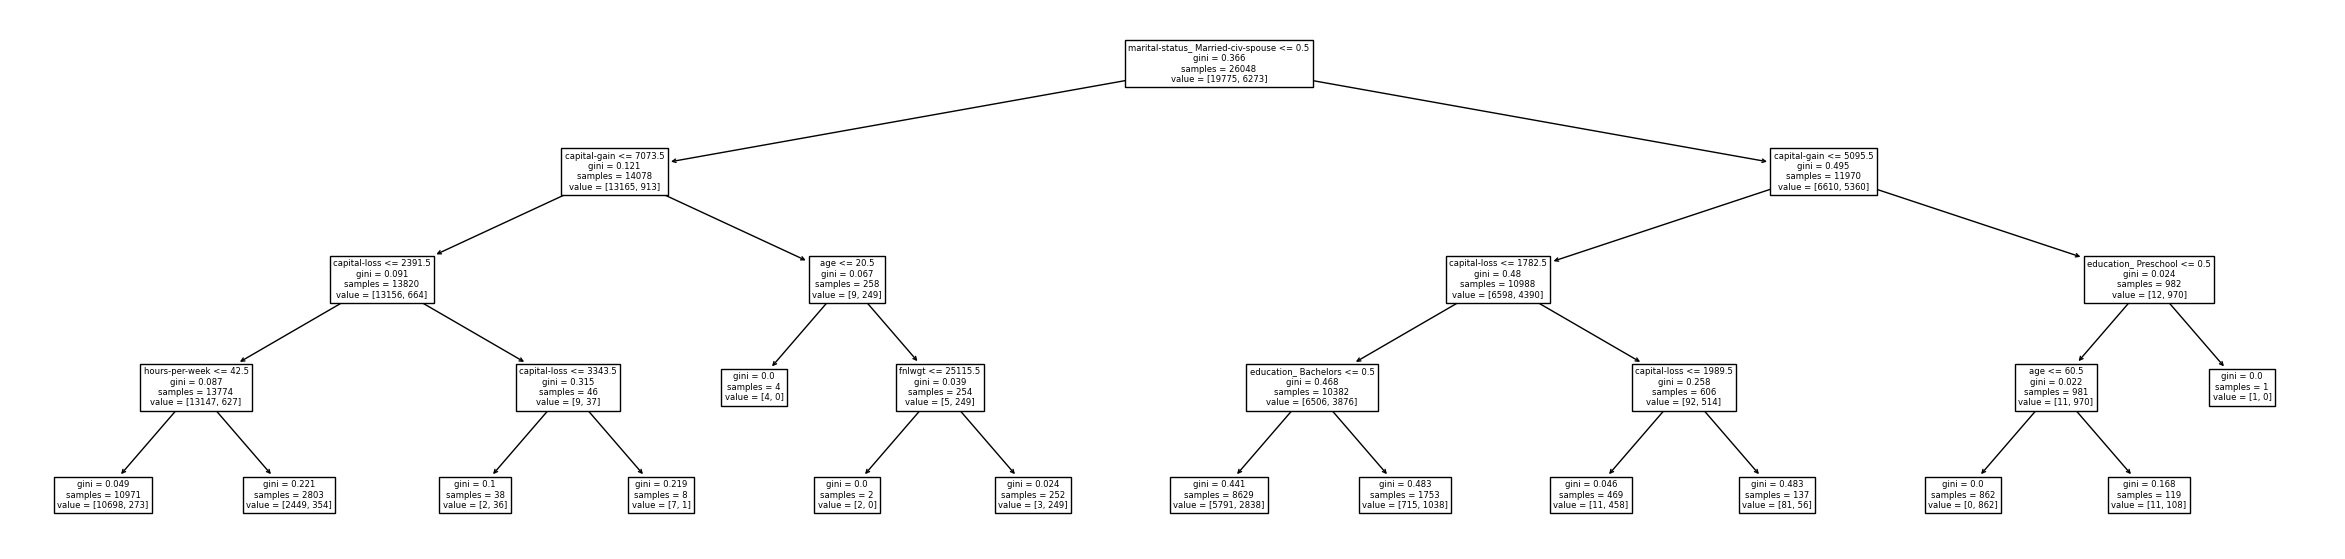

In [151]:
fig, ax = plt.subplots(figsize=(30, 7))
plot_tree(clf, ax=ax, feature_names=all_features);

In [175]:
y_pred = clf.predict(X_test)

In [176]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_test, y_pred)

0.8512206356517734

In [185]:
params = {
    "max_depth": [ None, 2, 4, 8, 16, 32 ],
    "min_samples_split": [ 2, 4, 8 ],
    "min_impurity_decrease": [ 0., 0.05 ]
}

In [186]:
from sklearn.model_selection import GridSearchCV

In [187]:
gs = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring='accuracy')

In [188]:
gs.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 2, 4, 8, 16, 32],
                         'min_impurity_decrease': [0.0, 0.05],
                         'min_samples_split': [2, 4, 8]},
             scoring='accuracy')

In [189]:
gs.best_score_

0.8543657911921386

In [190]:
gs.best_params_

{'max_depth': 8, 'min_impurity_decrease': 0.0, 'min_samples_split': 4}

In [191]:
from sklearn.neighbors import KNeighborsClassifier

In [192]:
knn = KNeighborsClassifier(5)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.7758329494856441

In [199]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# knn = make_pipeline(StandardScaler(), KNeighborsClassifier(5))

# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)

# accuracy_score(y_test, y_pred)

In [203]:
weighted_acc = []
weighted_acc_no_preproc = []
weighted_acc_minmax = []

for k in range(1, 31):
    knn = make_pipeline(StandardScaler(), KNeighborsClassifier(k, weights="distance"))
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    weighted_acc.append(accuracy_score(y_test, y_pred))
    
    knn = make_pipeline(KNeighborsClassifier(k, weights="distance"))
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    weighted_acc_no_preproc.append(accuracy_score(y_test, y_pred))

    knn = make_pipeline(MinMaxScaler(), KNeighborsClassifier(k, weights="distance"))
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    weighted_acc_minmax.append(accuracy_score(y_test, y_pred))

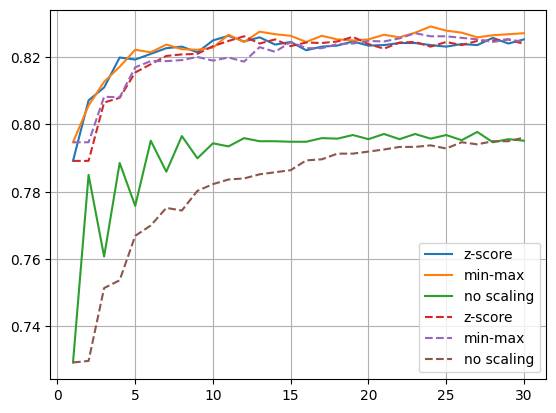

In [204]:
plt.plot(range(1, 31), acc, label="z-score")
plt.plot(range(1, 31), acc_minmax, label="min-max")
plt.plot(range(1, 31), acc_no_preproc, label="no scaling")

plt.plot(range(1, 31), weighted_acc, ls='--', label="z-score")
plt.plot(range(1, 31), weighted_acc_minmax, ls='--', label="min-max")
plt.plot(range(1, 31), weighted_acc_no_preproc, ls='--', label="no scaling")

plt.legend()
plt.grid()